<a href="https://colab.research.google.com/github/Excelfthn/DIP_Assignment_02/blob/main/DIP_Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports & Setup

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Utility Functions

In [14]:
from google.colab import files

def read_image_bgr():
    if IN_COLAB:
        uploaded = files.upload()
        fname = next(iter(uploaded))
        return cv2.imread(fname, cv2.IMREAD_COLOR)
    else:
        IMAGE_PATH = "your_image.jpg"
        return cv2.imread(IMAGE_PATH, cv2.IMREAD_COLOR)

def to_rgb(img_bgr):
    return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

def show_pair(title_left, img_left_rgb, title_right, img_right_rgb):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1); plt.title(title_left); plt.imshow(img_left_rgb); plt.axis("off")
    plt.subplot(1,2,2); plt.title(title_right); plt.imshow(img_right_rgb); plt.axis("off")
    plt.show()

In [15]:
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

# Enhancement Functions

In [16]:
def gaussian_blur(img_bgr, ksize=(7,7), sigma=0):
    return cv2.GaussianBlur(img_bgr, ksize, sigma)

def brighten(img_bgr, delta=50):
    return cv2.convertScaleAbs(img_bgr, alpha=1.0, beta=delta)

def darken(img_bgr, alpha=0.65):
    return cv2.convertScaleAbs(img_bgr, alpha=alpha, beta=0)

def lower_contrast(img_bgr, alpha=0.55, beta=25):
    return cv2.convertScaleAbs(img_bgr, alpha=alpha, beta=beta)


## Original Image

Saving ai-generated-picture-of-a-tiger-walking-in-the-forest-photo.jpg to ai-generated-picture-of-a-tiger-walking-in-the-forest-photo (1).jpg


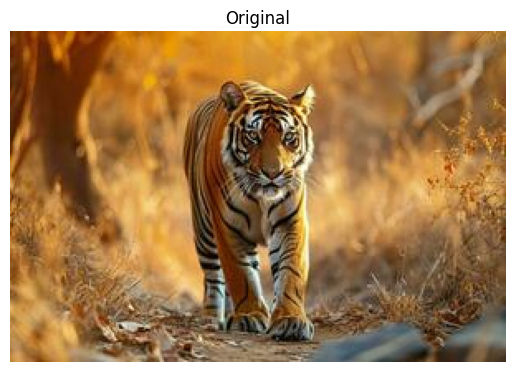

In [17]:
img_bgr = read_image_bgr()
orig_rgb = to_rgb(img_bgr)

plt.imshow(orig_rgb); plt.title("Original"); plt.axis("off"); plt.show()


## Blur

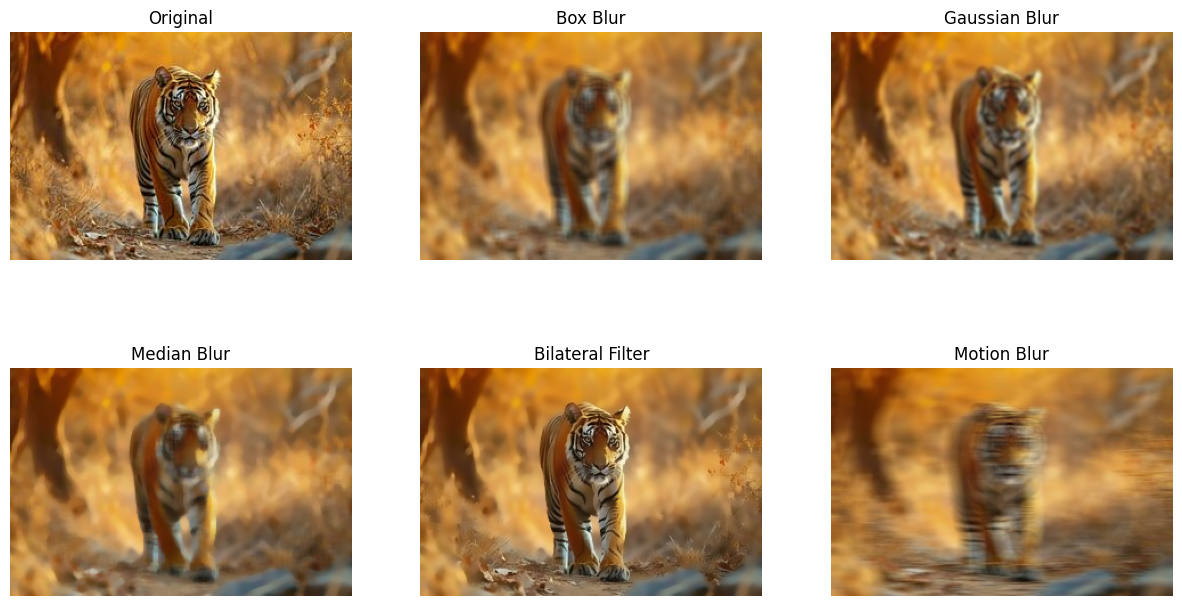

In [25]:
# 1. Box Blur (Mean Filter)
def blur_box(img_bgr, ksize=(5,5)):
    """
    Box blur: replaces each pixel with the average of neighbors.
    """
    return cv2.blur(img_bgr, ksize)

# 2. Gaussian Blur
def blur_gaussian(img_bgr, ksize=(5,5), sigma=0):
    """
    Gaussian blur: weighted average using a Gaussian kernel.
    """
    return cv2.GaussianBlur(img_bgr, ksize, sigma)

# 3. Median Blur
def blur_median(img_bgr, ksize=5):
    """
    Median blur: replaces pixel with median of neighborhood.
    Good for salt-and-pepper noise.
    """
    return cv2.medianBlur(img_bgr, ksize)

# 4. Bilateral Filter
def blur_bilateral(img_bgr, d=9, sigmaColor=75, sigmaSpace=75):
    """
    Bilateral filter: smooths flat areas but preserves edges.
    - d: neighborhood diameter
    - sigmaColor: filter sigma in color space
    - sigmaSpace: filter sigma in coordinate space
    """
    return cv2.bilateralFilter(img_bgr, d, sigmaColor, sigmaSpace)

# 5. Motion Blur
def blur_motion(img_bgr, ksize=15, direction="horizontal"):
    """
    Motion blur: simulates directional blur.
    - ksize: kernel length
    - direction: 'horizontal' or 'vertical'
    """
    kernel = np.zeros((ksize, ksize))
    if direction == "horizontal":
        kernel[ksize//2, :] = np.ones(ksize)
    else:
        kernel[:, ksize//2] = np.ones(ksize)
    kernel = kernel / ksize
    return cv2.filter2D(img_bgr, -1, kernel)

# Apply and Compare All Blurs
box_bgr = blur_box(img_bgr, (7,7))
gauss_bgr = blur_gaussian(img_bgr, (7,7), 0)
median_bgr = blur_median(img_bgr, 7)
bilat_bgr = blur_bilateral(img_bgr, d=9, sigmaColor=75, sigmaSpace=75)
motion_bgr = blur_motion(img_bgr, ksize=15, direction="horizontal")

import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.subplot(2,3,1); plt.imshow(orig_rgb); plt.title("Original"); plt.axis("off")
plt.subplot(2,3,2); plt.imshow(to_rgb(box_bgr)); plt.title("Box Blur"); plt.axis("off")
plt.subplot(2,3,3); plt.imshow(to_rgb(gauss_bgr)); plt.title("Gaussian Blur"); plt.axis("off")
plt.subplot(2,3,4); plt.imshow(to_rgb(median_bgr)); plt.title("Median Blur"); plt.axis("off")
plt.subplot(2,3,5); plt.imshow(to_rgb(bilat_bgr)); plt.title("Bilateral Filter"); plt.axis("off")
plt.subplot(2,3,6); plt.imshow(to_rgb(motion_bgr)); plt.title("Motion Blur"); plt.axis("off")
plt.show()



## Brighten

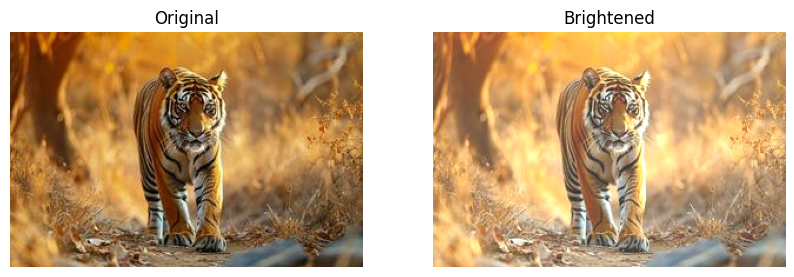

In [19]:
bright_bgr = brighten(img_bgr, delta=50)
show_pair("Original", orig_rgb, "Brightened", to_rgb(bright_bgr))


## Darken

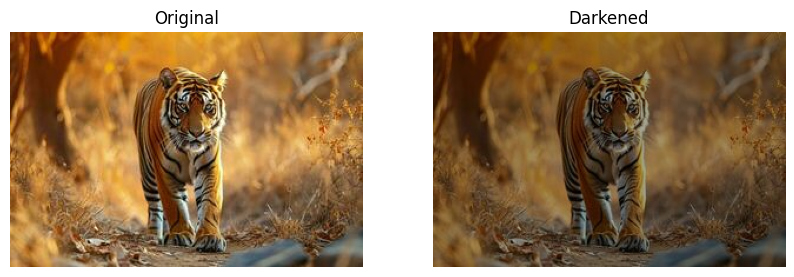

In [20]:
dark_bgr = darken(img_bgr, alpha=0.65)
show_pair("Original", orig_rgb, "Darkened", to_rgb(dark_bgr))


## Lower Contrast

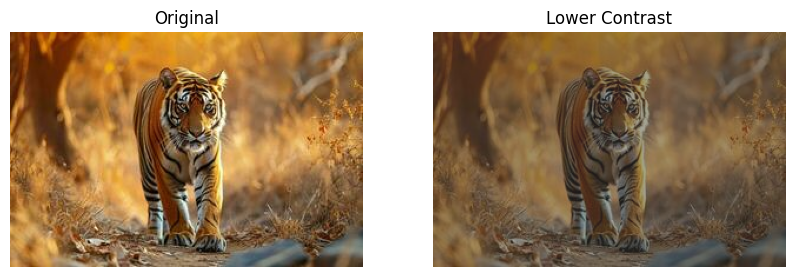

In [21]:
lowc_bgr = lower_contrast(img_bgr, alpha=0.55, beta=25)
show_pair("Original", orig_rgb, "Lower Contrast", to_rgb(lowc_bgr))


# Summary


From this experiment, several basic image enhancement techniques were implemented. Gaussian blur, box blur, median blur, bilateral filter, and motion blur each show different approaches to smoothing. Box blur averages neighboring pixels, Gaussian blur applies weighted smoothing, median blur effectively removes salt-and-pepper noise, bilateral filter smooths while preserving edges, and motion blur simulates directional movement. Brightening increases intensity values to make images lighter, darkening scales pixel values down to reduce brightness, and contrast reduction compresses the intensity range to lower differences between dark and light areas.